

# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is taken a dataset of more than 100K medical appointments, and analysing the relationshipe between these data and patiens behaviours whether showing up or not showing up. The dataset shows the fallwoing columns(PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show). Investigating this data will give an answer to the fallowing questions:
* Do young patient show up more than elderly?
* Does a certain gender affects patient attendance?
* Does SMS reminder decreases the number of patients absence? 

In [456]:
# load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [457]:
#load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [458]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



* The non-null column shows none missing value.
* (ScheduledDay,AppointmentDay) datatype need to be modify to be date/time


In [460]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Addressing issues:
    * Age min value shows (-1), which is impossible. Moreover, the max value shows 115, which strange value
    * Handcap max value shows (4), while the max value should be (1)

In [461]:
df.shape

(110527, 14)

In [462]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

no True value shows (each of the rows are unique)



### Data Cleaning No-show appointments

During this stage there are some issues need to be resolve:

    1. columns name need to be modify (smaller case and replace strange character)
    2. Drop unnecessary columns (PatientId,	AppointmentID)
    3. Ages less than 1 should be dropped.



* Renaming dataframe columns and replacing (-) with (_)

In [463]:
df.columns = df.columns.str.replace('-','_')
df.columns = df.columns.str.lower()

In [464]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



* Droping unnecessary columns (PatientId,    AppointmentID)

In [465]:
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

In [466]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




* Droping rows with (-1) as ages (will keep 0 value as it will be considered a value between 0 and 1). Ages with above 100 will be kept, though it's strange.

In [467]:
df.drop(df[df['age'] < 0].index, inplace=True)

In [468]:
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

min value = 0

In [469]:
df.shape

(110526, 12)

##### There is only one row has been dropped (from 110527 to 110526)

dropping handcap value, which is more than 1

In [470]:
df.drop(df[df['handcap'] > 1].index, inplace=True)

In [471]:
df['handcap'].describe()

count    110327.000000
mean          0.018509
std           0.134782
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: handcap, dtype: float64

The max value of hipertension column is equal to one.

In [472]:
df.shape

(110327, 12)

## Graph to have good overview of the data:

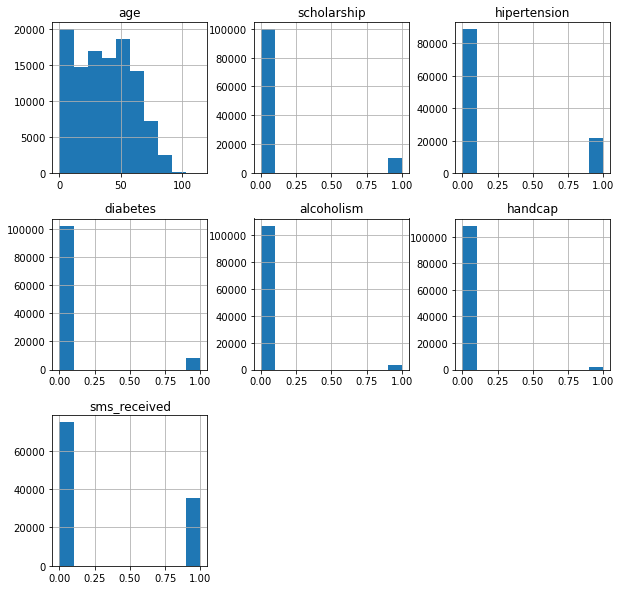

In [473]:
df.hist(figsize=(10,10));

Gender and no_show are not showing, because they are not numeric 

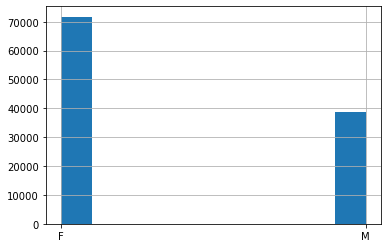

In [474]:
df['gender'].hist();

We have more female than male

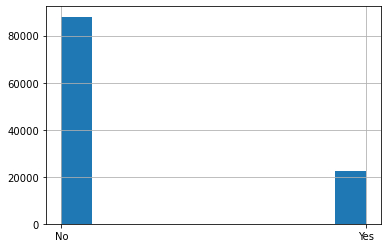

In [475]:
df['no_show'].hist();

Most of the patients showed up

In [476]:
# since it's says no when the patient showed up. This is to make the calculation easier

df['no_show'].replace({'No': 1, 'Yes': 0}, inplace=True)

In [477]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [478]:
showed = df.no_show == True
not_sh = df.no_show == False

<a id='eda'></a>
## Exploratory Data Analysis



### Does age influencing on showing up?

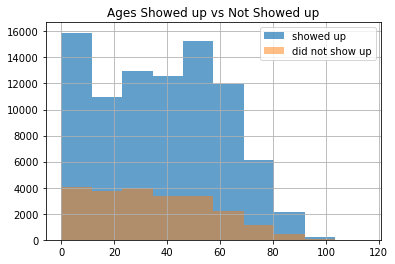

In [479]:

df.age[showed].hist(alpha=0.7, label='showed up')
df.age[not_sh].hist(alpha=0.5, label='did not show up')
plt.title('Ages Showed up vs Not Showed up')
plt.xlabel('')
plt.legend();

#### From the graph:
    * Young people showed up more than elderly people
    * Young people not showing up more than elderly people
#### This is due the significant difference between number of young patient and elderly patient

### Does Gender influence on showing up?

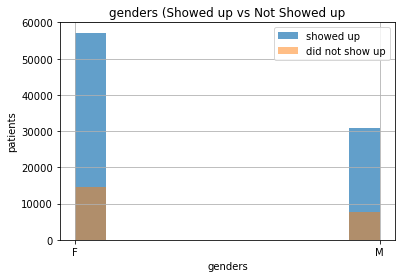

In [480]:
df.gender[showed].hist(alpha=0.7, label='showed up')
df.gender[not_sh].hist(alpha=0.5, label='did not show up')
plt.title('genders (Showed up vs Not Showed up')
plt.xlabel('genders')
plt.ylabel('patients')
plt.legend();

There are huge different between female paitients and male paitients.

In [481]:
# total of females patient
female_total, fc = df.query('gender == "F"').shape

In [482]:
# total of males patient
male_total, mc = df.query('gender == "M"').shape

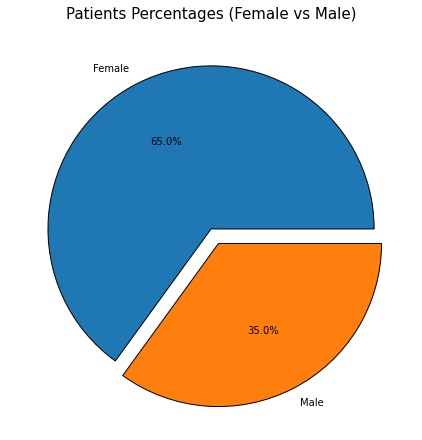

In [483]:
fig= plt.subplots(figsize=(15, 7.5))

labels = ['Female','Male']
locations = (female_total,male_total)

# wedgeprops is to create edges between the different parts (edgecolor is dictionary)
# autopct to print percentage on the parts
explode = (0,0.1)
plt.pie(locations, explode=explode, labels=labels, wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
plt.title('Patients Percentages (Female vs Male)', fontsize=15)
plt.show()

This shows that females patient are more than male in general. Therefore, more investigation need to be done.

#### To do this the average of the Showing up will be taken for each gender

In [484]:
# total of females shown up
shown_up_female, sh_f = df.query('gender == "F" & no_show == 1').shape

In [485]:
shown_up_female

57162

In [486]:
shown_up_male, sh_m = df.query('gender == "M" & no_show == 1').shape

In [487]:
shown_up_male

30887

In [497]:
# def to give percentages 
def percentage(total, show_up):
    show_up_percentage = show_up / total * 100
    no_show_percetage = 100 - show_up_percentage
    return (show_up_percentage, no_show_percetage)

In [498]:
female_percentage = percentage(female_total, shown_up_female)

In [499]:
male_percentage = percentage(male_total, shown_up_male)

In [500]:
female_percentage

(79.6905060644082, 20.309493935591803)

In [501]:
male_percentage

(80.02435422442159, 19.975645775578414)

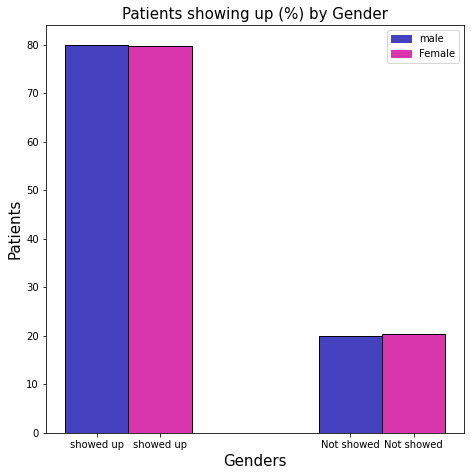

In [502]:
fig= plt.subplots(figsize=(7.5, 7.5))
locations = [1, 1.1, 1.40, 1.5]
labels = ['showed up', 'showed up', 'Not showed','Not showed']
genders = ['Male','Female']
hight = [male_percentage[0],female_percentage[0], male_percentage[1], female_percentage[1]]
patients = plt.bar(locations, hight, tick_label=labels, color=('#4642BF','#D935AC'), width= 0.10, edgecolor='black')
male_legend = mpatches.Patch(color='#4642BF', label='male')
female_legend = mpatches.Patch(color='#D935AC', label='Female')

plt.title('Patients showing up (%) by Gender', fontsize=15)
plt.xlabel('Genders', fontsize=15)
plt.ylabel("Patients", fontsize=15)
plt.legend(handles=[male_legend,female_legend])
plt.show()

##### This shows male and female they both have approximately the same percentage of showing up.

### Does SMS reminder decreases the number of patients absence?

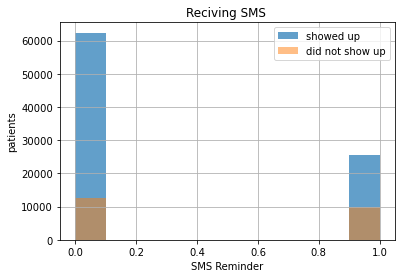

In [503]:
df.sms_received[showed].hist(alpha=0.7, label='showed up')
df.sms_received[not_sh].hist(alpha=0.5, label='did not show up')
plt.title('Reciving SMS ')
plt.xlabel('SMS Reminder')
plt.ylabel('patients')
plt.legend();

In [504]:
sms_count = df.groupby('sms_received')['no_show'].value_counts()
print(sms_count)

sms_received  no_show
0             1          62389
              0          12503
1             1          25660
              0           9775
Name: no_show, dtype: int64


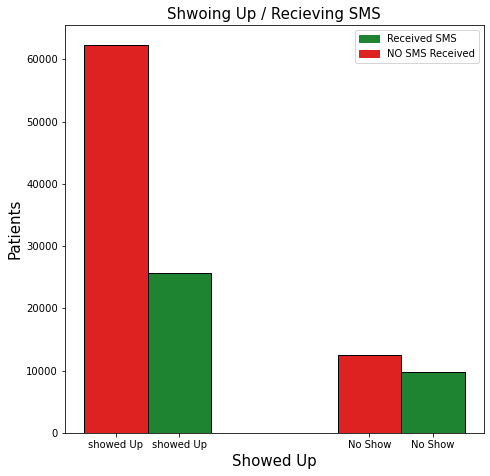

In [505]:
fig= plt.subplots(figsize=(7.5, 7.5))
locations = [1, 1.1, 1.4, 1.5]
labels = ['showed Up', 'showed Up', 'No Show','No Show']
sms = ['SMS Recived','No SMS']
hight = [sms_count.values[0],sms_count.values[2], sms_count.values[1], sms_count.values[3]]
patients = plt.bar(locations, hight, tick_label=labels, color=('#DE2222','#1F8432','#DE2222','#1F8432'), width= 0.10, edgecolor='black')
sms_legend = mpatches.Patch(color='#1F8432', label='Received SMS')
no_sms_legend = mpatches.Patch(color='#DE2222', label='NO SMS Received')

plt.title('Shwoing Up / Recieving SMS', fontsize=15)
plt.xlabel('Showed Up', fontsize=15)
plt.ylabel("Patients", fontsize=15)
plt.legend(handles=[sms_legend,no_sms_legend])
#plt.legend(genders)
plt.show()

This shows that most of the patients whome showed up didn't recive messages.

<a id='conclusions'></a>
## Conclusions

The invistigation could keep going with several quations. However, three quations that been asked give us the following sights:
* age one of the important factor which can indicate if the patients will show up or not, as young patients shows up more than elderly. With this being said there are few point about age that need to be metions:
    *  There are values of 0 and there are values  >100. The values of 0 has been left as it's been considered as less than 1 year (so it's months). There is also the values > 100, which been left even though it's strage.
    * Young patients number are significantly higher than elderly. Therefore, making judgement is unfair.

* Gender doesn't have effect on showing up or not, as female and male showed up approximately the same percentage.
* Reciving messages can't be use as an indicator for showing up as well 

In [506]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1